# pandas vor！（デモ）

みんなのPython勉強会#32 (2018/02/07)

nikkie

## 環境構築

venvで構築

- `pip install pandas jupyter`
- 図を描画するため追加 `pip install matplotlib`

## データの読み込み

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

扱うデータについて

以下のリポジトリのデータ(anime.csv)をPCに保存してpandasで触ってみました。

https://github.com/practical-jupyter/sample-data

- anime_id：内部的なID
- name：作品名
- genre：ジャンル(複数入力されている)
- type：分類(TV、映画など)
- episodes：話数
- rating：評価値（0〜10。小数値）
- members：評価者数

In [2]:
# ┣(このjupyter notebook)
# ┗data/
#    ┗anime.csv
anime_csv_path = 'data/anime.csv'

In [3]:
# アニメデータの読み込み
anime_df = pd.read_csv('data/anime.csv')

In [4]:
# 先頭の行を見てみる(引数を指定しないときは先頭から5行分表示される)
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [5]:
# 何行何列か確認
anime_df.shape

(10486, 7)

## データの確認

- type(劇場版、TVシリーズなどの分類)を把握する
- このデータ中での順位を求める

### typeを把握したい

In [6]:
# typeがMovieのアニメ(=劇場作品)の件数を求める
movie_df = anime_df[anime_df['type']=='Movie']
movie_df.shape

(2308, 7)

In [7]:
movie_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534
11,28851,Koe no Katachi,"Drama, School, Shounen",Movie,1,9.05,102733
15,199,Sen to Chihiro no Kamikakushi,"Adventure, Drama, Supernatural",Movie,1,8.93,466254
18,12355,Ookami Kodomo no Ame to Yuki,"Fantasy, Slice of Life",Movie,1,8.84,226193


In [8]:
# 条件がTrueとなる行が取り出された
(anime_df['type']=='Movie').head()

0     True
1    False
2    False
3    False
4    False
Name: type, dtype: bool

In [9]:
# typeの値でグループ化
type_grouped = anime_df.groupby('type')
len(type_grouped)

6

In [10]:
# 各グループに何件含まれるか
type_grouped.size()

type
Movie      2308
Music       486
ONA         644
OVA        1955
Special    1528
TV         3542
dtype: int64

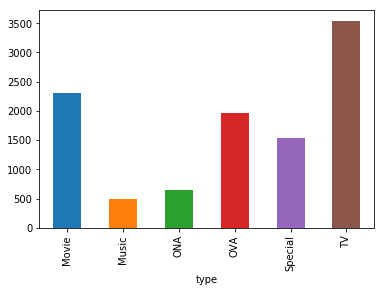

In [11]:
# typeの値で分けた6グループそれぞれのアニメの件数を可視化
ax = type_grouped.size().plot.bar()
plt.show()

### ガールズ&パンツァーの順位は？

In [12]:
# nameにPanzerを含むデータはあるか調べる
garupan_df = anime_df[anime_df['name'].str.contains('Panzer')]
garupan_df

,anime_id,name,genre,type,episodes,rating,members
80,18617,Girls und Panzer der Film,"Military, School",Movie,1,8.55,25641
907,18619,Girls und Panzer: Kore ga Hontou no Anzio-sen ...,"Military, School",OVA,1,7.76,16143
1100,14131,Girls und Panzer,"Military, School",TV,12,7.66,104275
1955,32740,Girls und Panzer der Film: Arisu War!,"Military, School",Special,1,7.36,6548
2505,15811,Girls und Panzer Specials,"Military, School",Special,6,7.20,15228
3048,18343,Girls und Panzer: Fushou - Akiyama Yukari no S...,"Military, School",Special,6,7.04,5867
3325,32741,Girls und Panzer der Film: Fushou - Akiyama Yu...,"Military, School",Special,2,6.94,1667
3692,33658,Girls und Panzer: Kore ga Hontou no Anzio-sen ...,"Military, School",Special,1,6.82,1114
4008,29853,Girls und Panzer Heartful Tank Disc: Fushou - ...,"Military, School",Special,2,6.75,1457
4215,32511,Girls und Panzer: Nihon Senshadou Renmei News,Comedy,Special,2,6.69,1134


rating順に順位を出してみる

In [13]:
# ratingの降順にソートする
sorted_df = anime_df.sort_values('rating', ascending=False)
sorted_df.head()

,anime_id,name,genre,type,episodes,rating,members
9846,33662,Taka no Tsume 8: Yoshida-kun no X-Files,"Comedy, Parody",Movie,1,10.00,13
9785,30120,Spoon-hime no Swing Kitchen,"Adventure, Kids",TV,Unknown,9.60,47
8985,23005,Mogura no Motoro,Slice of Life,Movie,1,9.50,62
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
8474,33607,Kahei no Umi,Historical,Movie,1,9.33,44


In [14]:
# 行の添字(index)の振り直し
rating_ascending_df = sorted_df.reset_index(drop=True)
rating_ascending_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,33662,Taka no Tsume 8: Yoshida-kun no X-Files,"Comedy, Parody",Movie,1,10.00,13
1,30120,Spoon-hime no Swing Kitchen,"Adventure, Kids",TV,Unknown,9.60,47
2,23005,Mogura no Motoro,Slice of Life,Movie,1,9.50,62
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
4,33607,Kahei no Umi,Historical,Movie,1,9.33,44


In [15]:
# Girls und Panzer der Film(劇場版ガルパン)が何位か調べる
# ratingの降順にソートしてから振り直したindexは0から始めるため、順位として扱うには+1する
rating_ascending_df[rating_ascending_df['name']=='Girls und Panzer der Film'].index[0]+1

101

## まとめ

- DataFrameは表
- 行／列の指定や条件を使ってデータを抽出できる
- groupbyで得たSeriesから棒グラフを作成
- ソート&プロパティ(index)の組合せで順位の算出も容易

# 「pandasに扱えないデータはありません」（おそらく）by nikkie 

# ご清聴ありがとうございました。